# Analyse S-Bahn München Disruptions

Twitter lets us only downloda the last ~3200 tweets and in this case we only get approx. 2500 tweets.

In [3]:
# Helpful functions
import pandas as pd
import numpy as np
import seaborn as sns

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

In [44]:
import re

In [151]:
sns.set()

In [152]:
tweets = pd.read_excel('tweets.xlsx')
tweets['Created At'] = pd.to_datetime(tweets['Created At'])
tweets = tweets[tweets['Tweet Type'] == 'Tweet']
tweets = tweets.drop(['Tweet Id', 'Name', 'Screen Name', 'Language', 'Client', 'Tweet Type', 'Media Type', 'URLs'], axis=1)

In [153]:
tweets.head()

,Text,Created At,Favorites,Retweets,Hashtags,Mentions
0,#Gesamtnetz: Technische Störung am Zug / Beein...,2018-02-08 10:44:55,0,0,4,0
1,#Gesamtnetz: Technische Störung am Zug behoben...,2018-02-08 10:54:42,0,0,4,0
2,#Gesamtnetz: Verkehrslage hat sich weitestgehe...,2018-02-08 11:26:50,1,1,3,0
3,#S1 #Freising / #Flughafen: Störung am Gleis /...,2018-02-08 12:34:14,2,0,5,0
4,#S7 #Kreuzstraße: Technische Störung an einem ...,2018-02-08 12:39:07,0,0,4,0


In [154]:
text = tweets['Text'].str.lower() \
    .str.replace(':', '') \
    .str.replace('#', '') \
    .str.replace('/', '') \
    .str.replace('\n', '') \
    .str.replace('.', '') \
    .str.replace(',', '') \
    .str.cat(sep=' ')
words = text.split(' ')
words = pd.DataFrame(data=np.unique(words))
words.columns = ['Word']

words['Freq'] = [text.count(w) for w in words['Word']]
words.sort_values(by='Freq', ascending=False)

#words[words['Word'].str.startswith('s')]
words[words['Word'].str.match('([s])[1-9]{1,2}', as_indexer=True)].sort_values(by='Freq', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


,Word,Freq
454,s8,408
446,s2,385
453,s7,308
444,s1,240
452,s6,185
449,s3,167
450,s4,165
447,s20,17
445,s18,2
451,s46,2


In [155]:
words[words['Word'] == 'gesamtnetz']

,Word,Freq
242,gesamtnetz,74


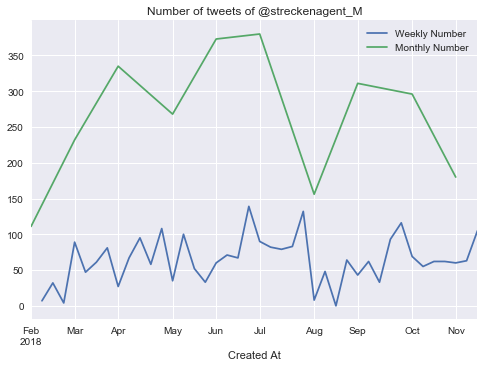

In [185]:
tweets.index = tweets['Created At']
tweets['Text'].groupby(pd.Grouper(freq='W')).count().plot()
tweets['Text'].groupby(pd.Grouper(freq='M')).count().plot(title='Number of tweets of @streckenagent_M')
plt.legend(['Weekly Number', 'Monthly Number'])
plt.savefig('num_tweets.jpg', dpi=300)

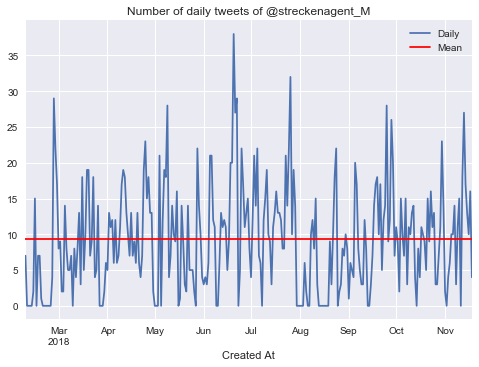

In [182]:
tweets.index = tweets['Created At']
tweets['Text'].groupby(pd.Grouper(freq='D')).count().plot(title='Number of daily tweets of @streckenagent_M')
plt.axhline(tweets['Text'].groupby(pd.Grouper(freq='D')).count().mean(), color='red')
plt.legend(('Daily', 'Mean'))

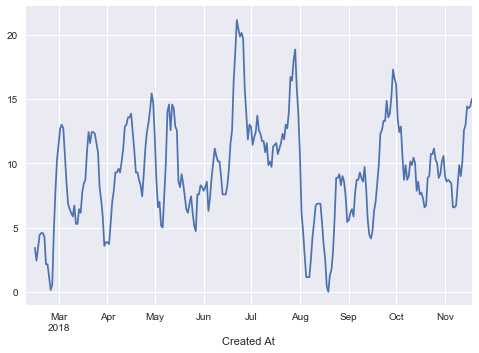

In [178]:
tweets['Text'].groupby(pd.Grouper(freq='D')).count().rolling(7).mean().plot()